In [2]:
import os
import skimage.io as io
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_dir = '/home/milton/dataset/segmentation/BRATS/BRATS2015/'
train_dir_hgg = os.path.join(data_dir, "training","HGG")
train_dir_lgg = os.path.join(data_dir, "training", "LGG")


In [1]:
img=sitk.ReadImage("index.jpeg")
plt.imshow(sitk.GetArrayViewFromImage(img))

NameError: name 'sitk' is not defined

VSD.Brain.XX.O.MR_T1.36125.mha
(240, 240, 1)


TypeError: Invalid dimensions for image data

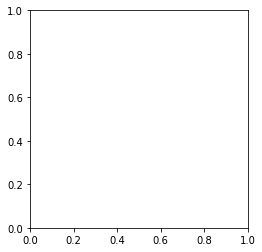

In [3]:
#print(os.listdir(os.path.abspath(train_dir_hgg)))
for dirname in os.listdir(train_dir_hgg):
    data_dir = os.path.join(train_dir_hgg, dirname )
    files = os.listdir(data_dir)
    for file in files:
        print(file)
        filepath = os.path.join(data_dir, file)
        img_arr = sitk.GetArrayFromImage(sitk.ReadImage(filepath))
        img_arr = np.transpose(img_arr)
        img1 = img_arr[:,:,0:1]
        print(img1.shape)
        plt.imshow(img1)
        break
    break

In [9]:
mr_image = sitk.ReadImage('/home/milton/dataset/segmentation/BRATS/BRATS2015/training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T2.54513.mha')
npa = sitk.GetArrayViewFromImage(mr_image)
print(npa.shape)

# Display the image slice from the middle of the stack, z axis
z = int(mr_image.GetDepth()/2)
npa_zslice = sitk.GetArrayViewFromImage(mr_image)[100,:,:]
print(npa_zslice[100,100])
# Three plots displaying the same data, how do we deal with the high dynamic range?
fig = plt.figure()
fig.set_size_inches(15,30)

fig.add_subplot(1,3,1)
plt.imshow(npa_zslice)

fig.add_subplot(1,3,2)
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r);

fig.add_subplot(1,3,3)
plt.title('grey colormap,\n scaling based on volumetric min and max values')
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r, vmin=npa.min(), vmax=npa.max())


RuntimeError: Exception thrown in SimpleITK ReadImage: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:74:
sitk::ERROR: The file "/home/milton/dataset/segmentation/BRATS/BRATS2015/training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T2.54513.mha" does not exist.

[0]


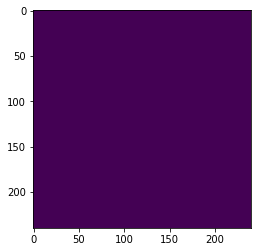

In [6]:
import imageio
import numpy as np

path = '/home/milton/dataset/segmentation/BRATS/BRATS2015/training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1.54513.mha'
path2='/home/milton/dataset/segmentation/BRATS/MICCAI_BraTS17_Data_Training/HGG/Brats17_2013_2_1/Brats17_2013_2_1_flair.nii.gz'
label_path="/home/milton/dataset/segmentation/BRATS/BRATS2015/training/HGG/brats_2013_pat0001_1/VSD.Brain_3more.XX.O.OT.54517.mha"
img= sitk.ReadImage(label_path)
slices = sitk.GetArrayViewFromImage(img)[11,:,:]
print(np.unique(slices))
plt.imshow(slices)

#imageio.imwrite('outfile.jpg', slices)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 150 151 152 153 154 155 156 157 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 25

/usr/local/lib/python2.7/dist-packages/imageio/core/util.py:104: UserWarning: Conversion from int16 to uint8, range [0, 835]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


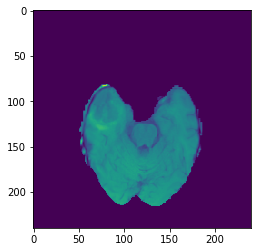

In [17]:
import imageio
path = '/home/milton/dataset/segmentation/BRATS/BRATS2015/training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1.54513.mha'
path2='/home/milton/dataset/segmentation/BRATS/MICCAI_BraTS17_Data_Training/HGG/Brats17_2013_2_1/Brats17_2013_2_1_seg.nii.gz'
label_path="/home/milton/dataset/segmentation/BRATS/BRATS2015/training/HGG/brats_2013_pat0001_1/VSD.Brain_3more.XX.O.OT.54517.mha"

img= sitk.ReadImage(path)
slices = sitk.GetArrayViewFromImage(img)[50,:,:]
print(np.unique(slices))
print(np.max(slices))
plt.imshow(slices)

imageio.imwrite('label.jpg', slices)